# Text Analytics

In [1]:
import preprocess2
sg_corpus = preprocess2.load_corpus('./SGNews')
sg_docs = preprocess2.corpus2docs(sg_corpus)

import gensim
sg_dictionary = gensim.corpora.Dictionary(sg_docs)
sg_vecs = preprocess2.docs2vecs(sg_docs, sg_dictionary)

C:\Users\swapnag\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Now we are ready to perform LDA on the document vectors `sg_vecs`.
The code below shows how to call the function. Note that this will
also take a while to finish.

In [2]:
#I used 10 topics. You can try other numbers as well
sg_lda = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=10)


The variable `sg_lda` now stores the 10 learned topics.

To inspect these learned topics, we can use a function called `show_topics`.
This function allows us to specifiy how many topics we want to inspect and for each topic how many top words we want to include.
Let us use `show_topics(10, 15)` to choose all 10 topics and for each topic we choose the top-15 most frequent words.
Then we can display the topics one by one. For each topic, we see a list of words together with their probabilities shown.

In [3]:
topics = sg_lda.show_topics(10, 5)

for i in range(0, 10):
    print(topics[i])

(0, '0.003*"time" + 0.003*"years" + 0.003*"french" + 0.002*"us" + 0.002*"france" + 0.002*"team" + 0.002*"back" + 0.002*"win" + 0.002*"queen" + 0.002*"get" + 0.002*"second" + 0.002*"paris" + 0.002*"made" + 0.002*"think" + 0.002*"season"')
(1, '0.004*"us" + 0.003*"time" + 0.003*"london" + 0.003*"united" + 0.003*"think" + 0.002*"title" + 0.002*"years" + 0.002*"city" + 0.002*"china" + 0.002*"going" + 0.002*"win" + 0.002*"way" + 0.002*"back" + 0.002*"million" + 0.002*"made"')
(2, '0.010*"obama" + 0.008*"us" + 0.007*"romney" + 0.004*"breivik" + 0.004*"president" + 0.003*"police" + 0.003*"former" + 0.003*"years" + 0.003*"court" + 0.003*"republican" + 0.003*"united" + 0.003*"campaign" + 0.003*"mr" + 0.002*"million" + 0.002*"gay"')
(3, '0.010*"killed" + 0.005*"security" + 0.005*"us" + 0.004*"police" + 0.004*"forces" + 0.004*"city" + 0.003*"attacks" + 0.003*"afp" + 0.003*"government" + 0.003*"afghan" + 0.003*"afghanistan" + 0.003*"fire" + 0.003*"town" + 0.003*"attack" + 0.003*"reported"')
(4, '0

#### Analyse the output
- By looking at the most important words under each topic, do you find the topics meaningful? How would you summarize or label each topic?

- If you re-run the LDA code above, you'll get a different set of topics. This is because there is some randomness in the LDA algorithm. Try to re-run the code above to re-generate `sg_lda` and insepct the learned topics again.

- The code above sets the number of topics to 10. You can try different numbers of topics (e.g., 5, 10, etc.) and see what the results look like.


### Visualizations

pyLDAvis is a python libarary for interactive topic model visualization. It is a port of the fabulous R package by Carson Sievert and Kenny Shirley. They did the hard work of crafting an effective visualization. pyLDAvis makes it easy to use the visualiziation from Python and, in particular, Jupyter notebooks. 

https://nbviewer.jupyter.org/github/bmabey/pyLDAvis/blob/master/notebooks/pyLDAvis_overview.ipynb#topic=0&lambda=1&term=


In [ ]:
#Install the package
#!pip install pyldavis

In [5]:
#Set up the environment to display the graphical outputs
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [6]:
# Generate the visuals
visual= pyLDAvis.gensim.prepare(sg_lda, sg_vecs, sg_dictionary)

C:\Users\swapnag\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


### Store the output and analyse the results

In [7]:
#Save the output to the html file
pyLDAvis.save_html(visual, "topic_viz.html")

The file topic_viz.html is stored in your directory. Open it and analyse.


## Additional  Concepts 

### LDA Mallet Model

Another LDA model from gensim and has better performance. I tried this last year for my reserach project and looks better.

In [1]:
import gensim
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
import os
os.environ.update({'MALLET_HOME':r'D:/Softwares/mallet/mallet-2.0.8/'})

no_topics=10 #make this 2 to test. 
no_ter=1000 #make this 50 to test

mallet_path = r'D:\Softwares\mallet\mallet-2.0.8\bin\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=sg_vecs, iterations=no_iter, num_topics=no_topics, id2word=sg_dictionary)


NameError: name 'sg_vecs' is not defined

In [11]:
# Show Topics
#print(ldamallet.show_topics(formatted=False))
#print(ldamallet.show_topics())

vecTop= ldamallet.show_topics()
for i in range(0, 10):
    print(vecTop[i])

(0, '0.012*"team" + 0.008*"game" + 0.007*"games" + 0.007*"win" + 0.007*"league" + 0.006*"final" + 0.006*"time" + 0.006*"club" + 0.006*"season" + 0.006*"players"')
(1, '0.010*"show" + 0.006*"film" + 0.006*"music" + 0.004*"love" + 0.004*"time" + 0.004*"star" + 0.004*"life" + 0.003*"singer" + 0.003*"fans" + 0.003*"tv"')
(2, '0.013*"north" + 0.012*"security" + 0.010*"killed" + 0.008*"korea" + 0.007*"military" + 0.007*"syria" + 0.007*"forces" + 0.007*"government" + 0.006*"launch" + 0.006*"south"')
(3, '0.014*"president" + 0.012*"party" + 0.011*"minister" + 0.011*"government" + 0.009*"country" + 0.009*"political" + 0.007*"obama" + 0.007*"myanmar" + 0.007*"prime" + 0.006*"election"')
(4, '0.015*"cent" + 0.014*"million" + 0.009*"company" + 0.007*"billion" + 0.006*"online" + 0.006*"market" + 0.005*"business" + 0.005*"facebook" + 0.005*"internet" + 0.005*"social"')
(5, '0.013*"court" + 0.009*"ldquo" + 0.008*"case" + 0.008*"rdquo" + 0.008*"news" + 0.008*"media" + 0.006*"public" + 0.005*"family" +

Analyse the results. Compare the topics with the previous LDA model.


### Perplexity and Coherence Score

Perplexity and topic coherence scoring provide a convenient measure to judge how good a given topic model

In [19]:
# Compute Coherence Score
from gensim.models import CoherenceModel
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=sg_docs, dictionary=sg_dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score LDAMallet: ', coherence_ldamallet)

coherence_model_lda = CoherenceModel(model=sg_lda, texts=sg_docs, dictionary=sg_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score LDAModel: ', coherence_lda)


Coherence Score LDAMallet:  0.5583612368917332

Coherence Score DAModel:  0.37248441145157163


### How to choose the optimal number of the topics?

On approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.


In [20]:
# Can take a long time to run. In this case we are going to  k_max=10.
import datetime
print(datetime.datetime.now())

from gensim.models import CoherenceModel

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 10, 2):
    #sg_lda_x = gensim.models.ldamodel.LdaModel(corpus=sg_vecs, id2word=sg_dictionary, num_topics=num_topics)
    sg_lda_x = gensim.models.wrappers.LdaMallet(mallet_path, iterations=100, corpus=sg_vecs, num_topics=no_topics, id2word=sg_dictionary)
    coherencemodel = CoherenceModel(model=sg_lda_x, texts=sg_docs, dictionary=sg_dictionary, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(sg_lda_x)
    coherence_values.append(coherencemodel.get_coherence())
    print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

print(datetime.datetime.now())

2020-02-19 12:54:30.074383
#Topics: 2 Score: 0.5687522490274634
#Topics: 4 Score: 0.5294431315293604
#Topics: 6 Score: 0.5630707191924498
#Topics: 8 Score: 0.5682421663807438
2020-02-19 13:03:18.575031


### Graphical Representation of the Coherence Score

Pyplot is a python library that provides functions to plot the graphs. In our case, we want to plot the graph with num of topics Vs Coherence scores of the model. 


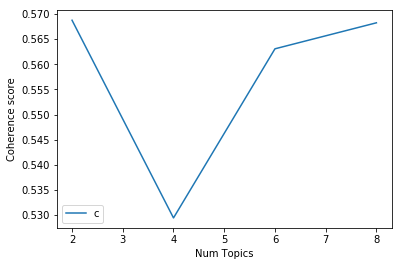

In [21]:
# Show graph

import matplotlib.pyplot as plt

limit=10; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [23]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5688
Num Topics = 4  has Coherence Value of 0.5294
Num Topics = 6  has Coherence Value of 0.5631
Num Topics = 8  has Coherence Value of 0.5682


###  Most Dominant Topic for each Document

One of the practical application of topic modeling is to determine what topic a given document is about.

To find that, we find the topic number that has the highest percentage contribution in that document. We need to first decide on the optimal LDA model from the previous graph 

In [22]:
#Find most dominant topic

import numpy as np
import pandas as pd

def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#I choose model_list[1] where the number of topics is 4

#df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[1], corpus=sg_vecs, data=sg_docs)
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamallet, corpus=sg_vecs, data=sg_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.2072,"show, film, music, love, time, star, life, sin...","[mumbai, designed, reduce, stress, improve, la..."
1,1,6.0,0.2464,"city, area, water, local, tokyo, air, agency, ...","[seoul, sirens, ring, across, south, korea, th..."
2,2,3.0,0.3872,"president, party, minister, government, countr...","[yangon, myanmar, leader, vowed, tuesday, put,..."
3,3,6.0,0.5771,"city, area, water, local, tokyo, air, agency, ...","[jakarta, rescuers, still, missing, days, wood..."
4,4,6.0,0.3376,"city, area, water, local, tokyo, air, agency, ...","[colombo, sri, lankan, court, jailed, four, st..."
5,5,8.0,0.1870,"china, chinese, beijing, japan, government, st...","[official, central, china, henan, province, sl..."
6,6,5.0,0.4377,"court, ldquo, case, rdquo, news, media, public...","[party, chief, southwest, china, chongqing, mu..."
7,7,2.0,0.2877,"north, security, killed, korea, military, syri...","[manila, philippines, although, police, author..."
8,8,3.0,0.5283,"president, party, minister, government, countr...","[leading, figures, opposition, democrat, party..."
9,9,4.0,0.2727,"cent, million, company, billion, online, marke...","[beijing, guangzhou, residents, satisfied, qua..."


### Save the Model

Saving model for future use will save the time on the iterations. It is often needed to save to model to reuse in the future. 

In [24]:
#Save a model to disk, or reload a pre-trained model
sg_lda_sav=ldamallet #Or you can save the best model, model_list[1]

sg_lda_sav.save("sg_lda_mallet")

lda_disk=gensim.models.wrappers.LdaMallet.load("sg_lda_mallet")

### Save the LDA distributions theta and beta

Saving the outputs to a csv file enables us to quickly analyse the data - mainly the topics in a friendly UI. We do not want to train the model every time as it may be expensive. 

In [25]:
#Code to save the document topic probabilities (theta)
import pandas as pd

vec=sg_lda_sav[sg_vecs]
pd.DataFrame(vec).to_csv("doc_topic_mixture.csv")

In [26]:
# Write code here to save top 10 words for each topic (beta)
top_words_per_topic = []
for t in range(sg_lda_sav.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in sg_lda_sav.show_topic(t, topn = 10)])

pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")


#### Analysis
Analyse the output with the actual documents. Are the topics relevant? Also use the most dominant topic and analyse.

### Resources
- LDA Mallet

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#20topicdistributionacrossdocuments

- Gensim LDA Model

https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

- Sklearn LDA Model

https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/#1introduction
